# Tugas 3 : Klasifikasi Berita Dengan Metode Logistic Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/ppw/report/tugas-ppw/hasil_prepros.csv")
df.head()

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,stopword_removal
0,"Jangan Disepelekan, Ini yang Terjadi Pada Tubu...","Minggu, 08 Sep 2024 16:08 WIB",Jakarta - Kematian seorang karyawan di China m...,Kesehatan,Jakarta Kematian seorang karyawan di China me...,jakarta kematian seorang karyawan di china me...,"['jakarta', 'kematian', 'seorang', 'karyawan',...",jakarta kematian karyawan china menyoroti baha...
1,Bolehkah Pengidap Kolesterol Tinggi Mengonsums...,"Minggu, 08 Sep 2024 15:01 WIB",Jakarta - Kadar kolesterol harus selalu dijaga...,Kesehatan,Jakarta Kadar kolesterol harus selalu dijaga ...,jakarta kadar kolesterol harus selalu dijaga ...,"['jakarta', 'kadar', 'kolesterol', 'harus', 's...",jakarta kadar kolesterol dijaga melebihi batas...
2,"Momen Jokowi Puji Fasilitas Rumah Sakit, Sebut...","Minggu, 08 Sep 2024 14:00 WIB",Jakarta - Presiden Joko Widodo (Jokowi) belaka...,Kesehatan,Jakarta Presiden Joko Widodo Jokowi belakanga...,jakarta presiden joko widodo jokowi belakanga...,"['jakarta', 'presiden', 'joko', 'widodo', 'jok...",jakarta presiden joko widodo jokowi meresmikan...
3,Daun Kelor Bisa Membantu Menyembuhkan Penyakit...,"Minggu, 08 Sep 2024 13:07 WIB",Jakarta - Daun kelor dikenal sebagai salah sat...,Kesehatan,Jakarta Daun kelor dikenal sebagai salah satu...,jakarta daun kelor dikenal sebagai salah satu...,"['jakarta', 'daun', 'kelor', 'dikenal', 'sebag...",jakarta daun kelor dikenal salah bahan alami m...
4,Budaya Kerja Toksik di Balik Kematian Karyawan...,"Minggu, 08 Sep 2024 11:25 WIB",Jakarta - Seorang pekerja di China meninggal s...,Kesehatan,Jakarta Seorang pekerja di China meninggal se...,jakarta seorang pekerja di china meninggal se...,"['jakarta', 'seorang', 'pekerja', 'di', 'china...",jakarta pekerja china meninggal tragis mengala...


**TF-IDF (Term Frequency-Inverse Document Frequency)**


---


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['stopword_removal'])


In [ ]:
# Menggunakan kolom 'cleaned_text' sebagai teks input dan 'kategori' sebagai label
texts = df['stopword_removal'].fillna('')  # Mengganti NaN dengan string kosong jika ada
labels = df['kategori'].fillna('unknown')  # Mengganti NaN di kategori jika ada

# Melihat label yang digunakan untuk klasifikasi
print(labels.unique())

['Kesehatan' 'Olahraga']


In [ ]:
# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,aa,abaaba,abadi,abao,abdillah,abdul,abidin,absen,ac,academy,...,zenno,zennoveren,zhejiang,zhoushan,zi,zika,zilazik,zokor,zumba,zurich
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.504497,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.084083,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.456784,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.101508,0.05531,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


**Spliting Data**

---


In [ ]:
from sklearn.model_selection import train_test_split
# Melakukan transformasi TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(texts)

# Memisahkan dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)

# Melihat bentuk dari hasil TF-IDF
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (80, 4527)
Shape of X_test: (20, 4527)


**Modeling**

---


In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat model Logistic Regression dengan regularisasi
model = LogisticRegression(max_iter=1000, C=0.2)  # Mengurangi nilai C untuk menambah regularisasi

# Melatih model dengan data yang sudah diresample (jika diperlukan)
model.fit(X_train, y_train)

# Memprediksi hasil pada data testing
y_pred = model.predict(X_test)



**Evaluasi Model**

---



In [ ]:
# Evaluasi hasil prediksi
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Menampilkan confusion matrix dan laporan klasifikasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Alternatif: Menggunakan cross-validation untuk mengecek overfitting
from sklearn.model_selection import cross_val_score

# Menggunakan cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%')


Accuracy: 95.00%
Confusion Matrix:
[[11  1]
 [ 0  8]]

Classification Report:
              precision    recall  f1-score   support

   Kesehatan       1.00      0.92      0.96        12
    Olahraga       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

Cross-validation accuracy: 82.50%


In [ ]:
# Simpan TF-IDF vectorizer dan model
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as tfidf_file:
    pickle.dump(vectorizer, tfidf_file)

with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

**Pengujian**


----


In [ ]:
import joblib

# Memuat vectorizer dan model
tfidf = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('logistic_regression_model.pkl')

In [ ]:
# Teks baru yang ingin diprediksi
new_text_1 = ['''Wasit memiliki peran krusial dalam olahraga. Disebut sebagai pemimpin pertandingan, seorang wasit bertugas sebagai hakim yang menentukan kualitas adilnya sebuah kompetisi. Pentingnya sosok serta kredibilitas seorang wasit membuat setiap keputusannya menjadi sebuah sorotan.
Tidak jarang, wasit membuat keputusan kontroversial. Namun, seiring dengan perkembangan teknologi, keputusan wasit lebih dapat dipertanggungjawabkan. Dalam sepakbola misalnya, teknologi yang dikenal sebagai VAR (Video Assistant Referee) bukan hanya memperkuat keputusan wasit tetapi juga mengubahnya. Meski demikian, keputusan wasit selalu bersifat final.
Menyoal kontroversi yang dilakukan wasit, kejadian terbaru muncul dalam pertandingan Bournemouth vs Chelsea yang dilaksanakan pada Sabtu (14/9) lalu di Stadion Vitality. Kala itu, Wasit Anthony Taylor mengeluarkan 16 kartu kuning untuk masing-masing tim. Oleh karenanya, ia tidak lagi ditugaskan sebagai wasit di Premiere League.
Timnas Indonesia sendiri pernah merasa dirugikan oleh adanya wasit yang diduga 'nakal'. Hal ini terjadi saat Tim Garuda berlaga melawan Uzbekistan di Piala Asia U-23 2024. Kala itu, pertandingan ini dipimpin oleh wasit Shen Yinhao. Oleh karena beberapa keputusan yang dianggap kontroversial, namanya pun diburu oleh netizen Indonesia di media sosial.''']

new_text_2 = ['''Mengkonsumsi buah setiap hari dapat membantu tubuh tetap sehat. Meski mengandung vitamin dan nutrisi tinggi, tetapi tak semua buah aman dikonsumsi bagi pengidap asam lambung.
Sedikit informasi, asam lambung atau gastroesophageal reflux disease (GERD) adalah gangguan pencernaan yang salah satunya dipicu oleh makanan. Maka dari itu, pengidapnya harus hati-hati dalam memilih makanan untuk dikonsumsi, termasuk buah-buahan.
Buah yang mengandung kadar asam tinggi dianjurkan untuk tidak dikonsumsi bagi pengidap GERD. Lantas, apa saja buah yang aman dikonsumsi oleh pengidap asam lambung? Simak selengkapnya dalam artikel ini.
Buah yang Aman untuk Pengidap Asam Lambung
Ada sejumlah buah yang baik dikonsumsi untuk pengidap asam lambung. Mengutip situs Healthline dan Medical News Today, berikut daftar buahnya:
1. Pisang
Di daftar yang pertama ada pisang. Buah ini dipercaya dapat membantu mengatasi asam lambung naik. Sebab, pisang memiliki pH tinggi sehingga bersifat basa atau rendah asam.
Buah yang bersifat basa dapat membantu menetralisir cairan asam di lambung dengan cara melindungi lapisan esofagus yang teriritasi.
Lalu, pisang juga mengandung serat larut bernama pekting. Senyawa ini dapat membantu memproses makanan dengan baik di sistem pencernaan.''']

# Gabungkan kedua teks menjadi satu list
new_text = new_text_1 + new_text_2

# Preprocessing dan transformasi menggunakan TF-IDF yang sudah disimpan
new_text_tfidf = tfidf.transform(new_text)

# Melakukan prediksi menggunakan model Logistic Regression
predictions = model.predict(new_text_tfidf)

# Hasil prediksi
predicted_categories = ["Kesehatan" if prediction == 'Kesehatan' else "Olahraga" for prediction in predictions]

# Output hasil prediksi untuk masing-masing teks
for i, category in enumerate(predicted_categories):
    print(f"Prediksi untuk teks {i+1}: {category}")



Prediksi untuk teks 1: Olahraga
Prediksi untuk teks 2: Kesehatan


**Link aplikasi klasifikasi berita**


---



https://news-app-classification.streamlit.app/

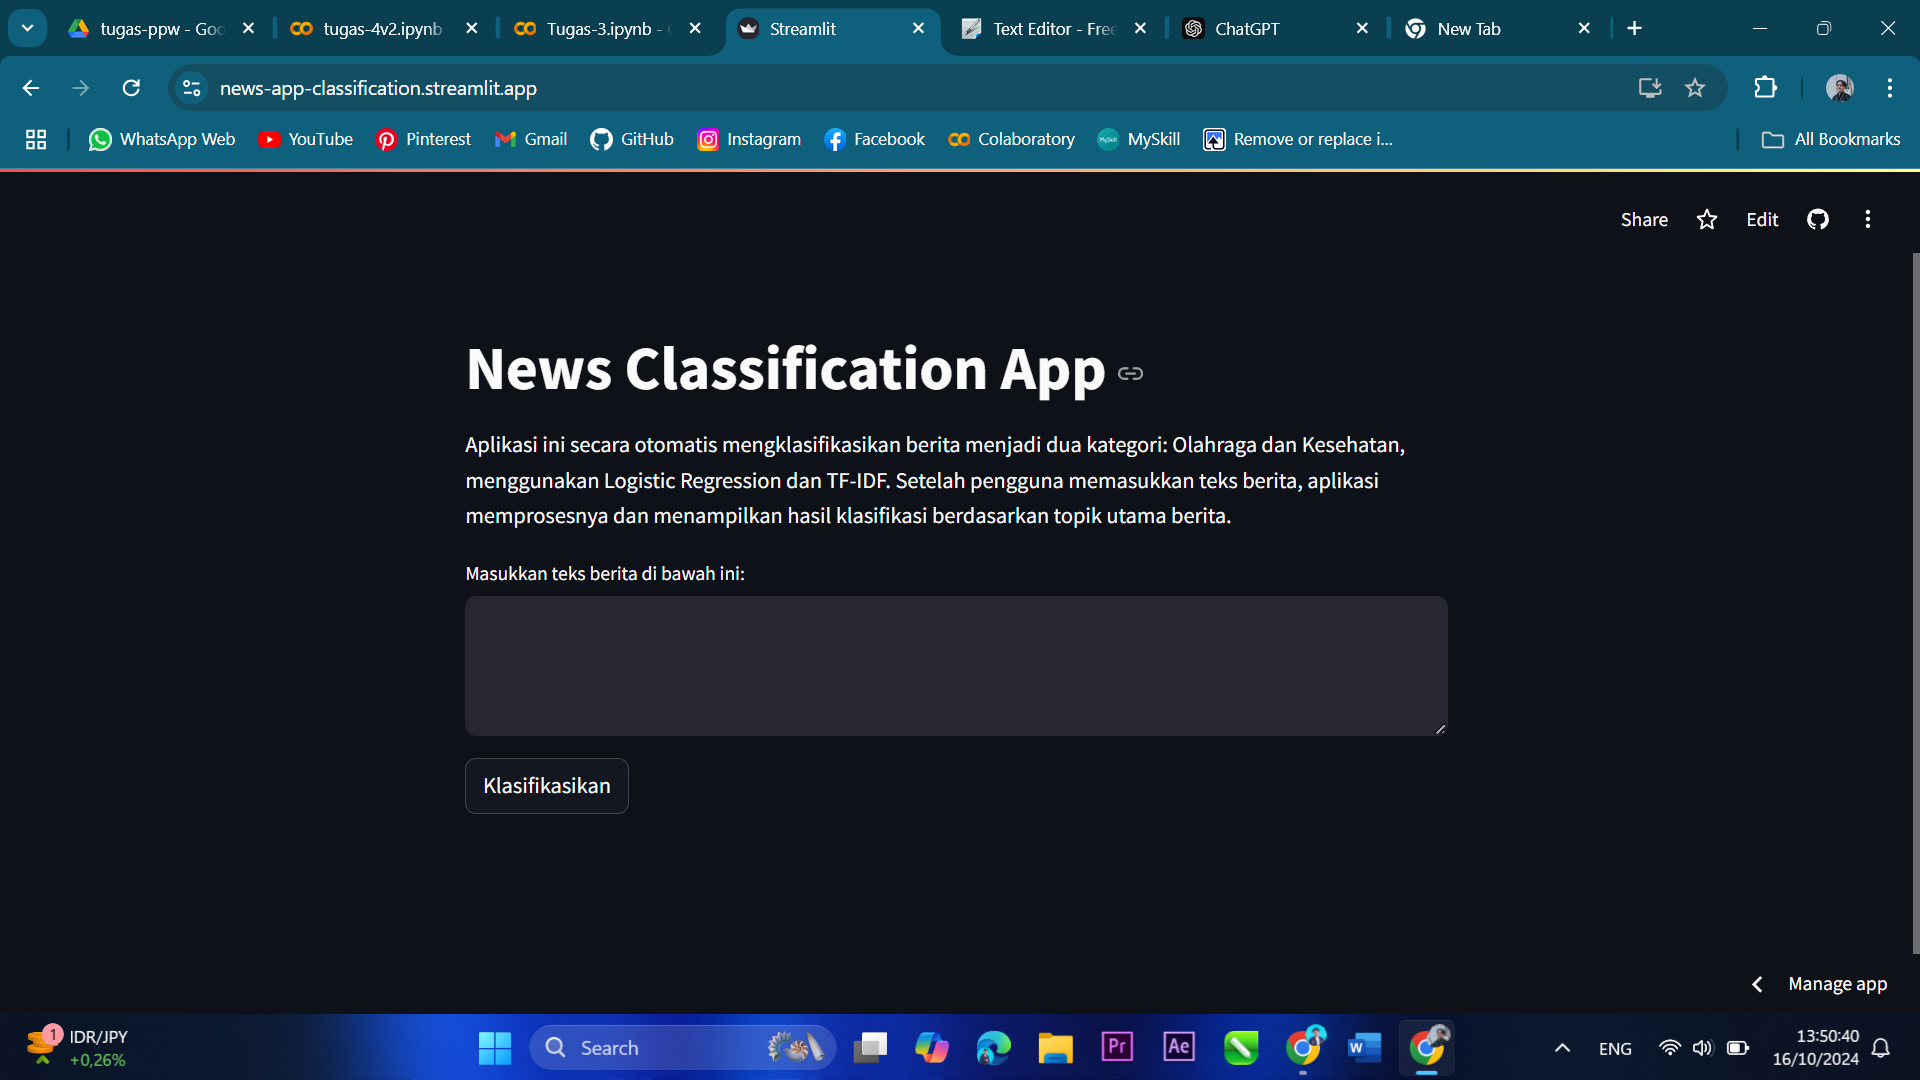